In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('data_for_predictions.csv')

df.head(3)

,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.0,0.000000,0.0,0.444045,0.114481,0.098142,...,2,6,0,0,1,0,0,0,0,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.0,2.280920,0.0,1.237292,0.145711,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.0,1.689841,0.0,1.599009,0.165794,0.087899,...,68,8,0,0,1,0,0,1,0,0


### DATA PREPROCESSING.

churn
0    13187
1     1419
Name: count, dtype: int64

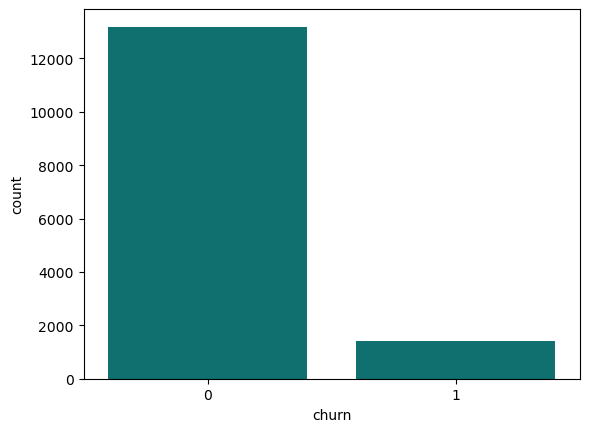

In [53]:
### Do a countplot on the label variable


sns.countplot(data=df, x='churn', color='teal')
value_count = df['churn'].value_counts()

value_count

 ##### As it is seen that we have a class imbalance with our Label features, we have to deal with this while training our model.

In [54]:
### We split the Data

df_copy = df.copy()


features = df_copy.drop(['churn','id','Unnamed: 0'],axis=1)
label = df_copy['churn']

list(features.head(5))

['cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'forecast_cons_12m',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_off_peak',
 'forecast_price_energy_peak',
 'forecast_price_pow_off_peak',
 'has_gas',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'nb_prod_act',
 'net_margin',
 'pow_max',
 'var_year_price_off_peak_var',
 'var_year_price_peak_var',
 'var_year_price_mid_peak_var',
 'var_year_price_off_peak_fix',
 'var_year_price_peak_fix',
 'var_year_price_mid_peak_fix',
 'var_year_price_off_peak',
 'var_year_price_peak',
 'var_year_price_mid_peak',
 'var_6m_price_off_peak_var',
 'var_6m_price_peak_var',
 'var_6m_price_mid_peak_var',
 'var_6m_price_off_peak_fix',
 'var_6m_price_peak_fix',
 'var_6m_price_mid_peak_fix',
 'var_6m_price_off_peak',
 'var_6m_price_peak',
 'var_6m_price_mid_peak',
 'offpeak_diff_dec_january_energy',
 'offpeak_diff_dec_january_power',
 'off_peak_peak_var_mean_diff',
 'peak_mid_peak_var_mean_diff',
 'off_peak_m

In [121]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 61 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   cons_12m                                    14606 non-null  float64
 1   cons_gas_12m                                14606 non-null  float64
 2   cons_last_month                             14606 non-null  float64
 3   forecast_cons_12m                           14606 non-null  float64
 4   forecast_discount_energy                    14606 non-null  float64
 5   forecast_meter_rent_12m                     14606 non-null  float64
 6   forecast_price_energy_off_peak              14606 non-null  float64
 7   forecast_price_energy_peak                  14606 non-null  float64
 8   forecast_price_pow_off_peak                 14606 non-null  float64
 9   has_gas                                     14606 non-null  float64
 10  imp_cons  

In [55]:
###  Get all your categorical Data out so as to Encode

categorical_data = features.select_dtypes(include="object")
categorical_data

""
0
1
2
3
4
...
14601
14602
14603
14604


We do not have any features as an objects, so no need Encoding for Categorical_data.

In [56]:
### Now let's do Scaling to have a sense of uniformity in our Numerical Data. 

### Perform a Visualization to know the type of Scaler to use.


numerical_data = features.select_dtypes(include ='number')

(numerical_data.head(3))

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0.000000,4.739944,0.0,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,1,...,2,6,0,0,1,0,0,0,0,1
1,3.668479,0.000000,0.0,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,0,...,76,4,1,0,0,0,0,1,0,0
2,2.736397,0.000000,0.0,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,0,...,68,8,0,0,1,0,0,1,0,0


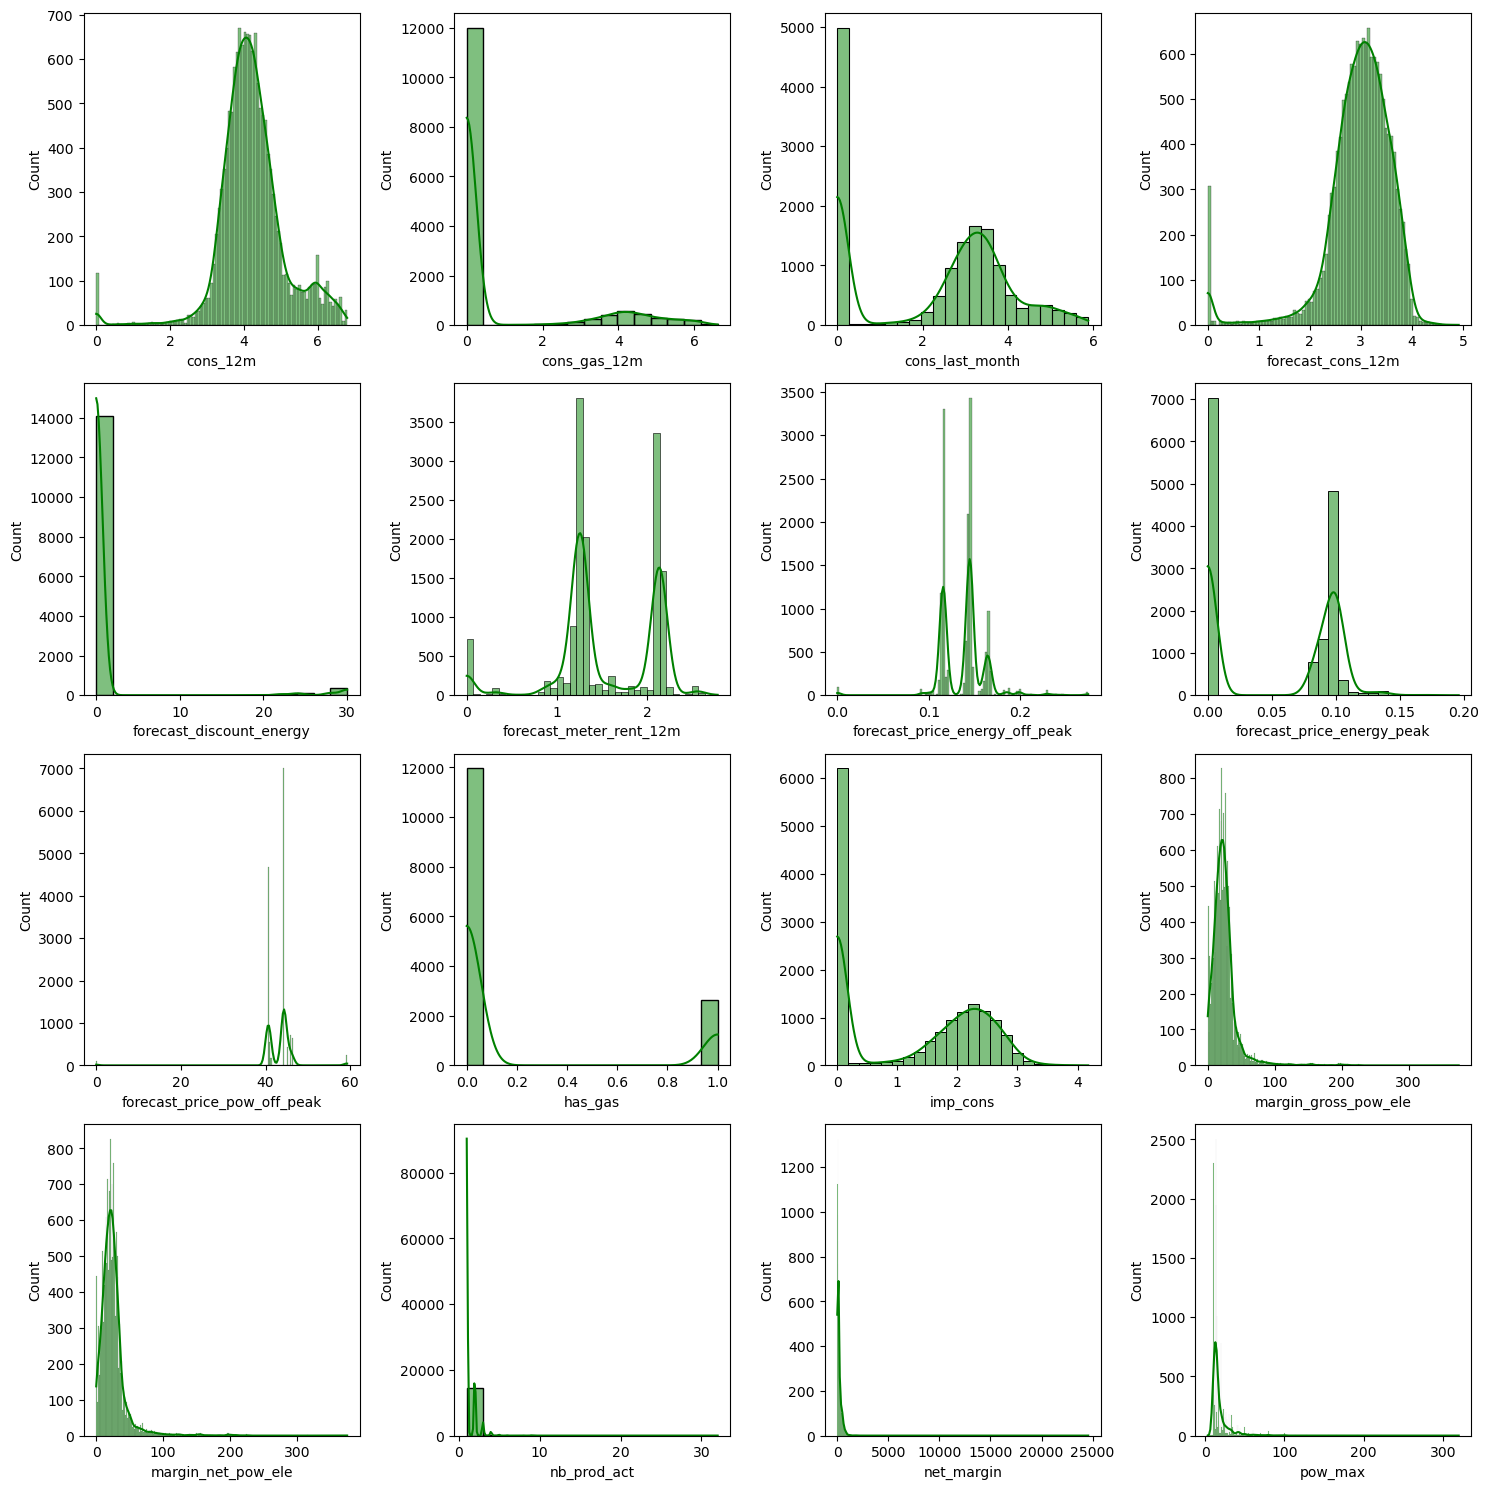

In [57]:
fig,axes = plt.subplots(nrows=4, ncols=4, figsize=(15,15))
position = axes.flatten()

for idx,column_name in enumerate(numerical_data.columns[:16]):
    sns.histplot(df_copy[column_name], kde = True, color='Green', ax=position[idx])
    
plt.tight_layout()
plt.show()

In [58]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

for idx, column_name in enumerate(numerical_data.columns):
    features[column_name] = scaler.fit_transform(features[column_name].values.reshape(-1,1))

numerical_data.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,1,...,2,6,0,0,1,0,0,0,0,1
1,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,0,...,76,4,1,0,0,0,0,1,0,0
2,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,0,...,68,8,0,0,1,0,0,1,0,0
3,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,0,...,69,9,0,0,0,1,0,1,0,0
4,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,0,...,71,9,1,0,0,0,0,1,0,0


In [59]:
label.head(5)

0    1
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

### MACHINE LEARNING

In [60]:
### Performing Data splitting.

from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(features,label,test_size = 0.20, random_state=42)

print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(11684, 61)
(11684,)
(2922, 61)
(2922,)


In [61]:
### Model Training.

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)


### Training the Model.
model.fit(Xtrain,ytrain)

RandomForestClassifier(random_state=42)

In [62]:
### Model Prediction.


predictions = model.predict(Xtest)
list(predictions)[:50]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [63]:
### Check your ytest and compare it with your xtest


ytest.values[:50]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

As we can see here, the ML model is not able to properly predict the Xtest when compared to ytest outcome with first 50 anwers. ytest outcome has 6 churns(1) while Xtest's first 50 answers has 2 Churns. This has to improve and properly trained again. 

In [64]:
### Evaluation of the Model.

from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(ytest,predictions,digits=5)

print(report)

              precision    recall  f1-score   support

           0    0.90072   0.99847   0.94708      2617
           1    0.80952   0.05574   0.10429       305

    accuracy                        0.90007      2922
   macro avg    0.85512   0.52710   0.52569      2922
weighted avg    0.89120   0.90007   0.85911      2922



In [65]:
matrix = confusion_matrix(ytest,predictions)
matrix

array([[2613,    4],
       [ 288,   17]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual')

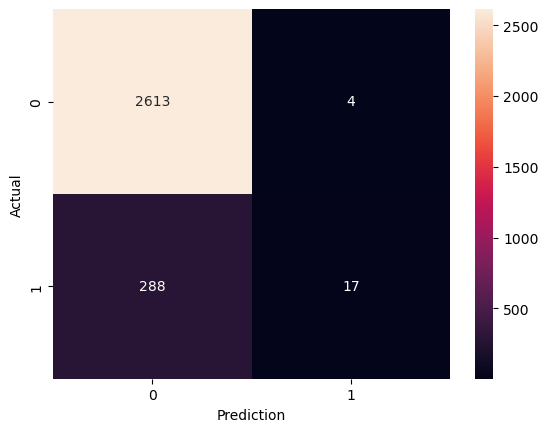

In [66]:
### Visualize the matrix with Heatmap.

sns.heatmap(matrix, annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Actual')

Explaiing the Confusion Matrix.

1.TRUE NEGATIVE(2613) - This means the model predicted 0 when the answer is 0(No Customer Churn) as well.

2.FALSE POSITIVE(4) - This means the model predicted 1 when the answer is 0(No Churn).

3.FALSE NEGATIVE(288) - This means the model falsely predicted no customer Churn, whereas the Actual outcome predicted (288) cases of Churn. This is very critical and has to be taken into consideration.

4.TRUE POSITIVE(17) - This means the model predicted 1(CHURN) when the answer is 1 as well. This is a correct prediction from the Model.


To better improve our Model Performance, as our False Negative is overly significantly high and our Recall from our Matrix on Class 1 is 0.05 which is very low due to Class imbalance from Churn Feature, we need to perform a class imbalance to improve our Model so we can reduce our False Negative and also increase our Recall on class 1 of our Churn.

              precision    recall  f1-score   support

           0    0.90141   0.99924   0.94781      2617
           1    0.90476   0.06230   0.11656       305

    accuracy                        0.90144      2922
   macro avg    0.90309   0.53077   0.53219      2922
weighted avg    0.90176   0.90144   0.86104      2922



Text(50.722222222222214, 0.5, 'Actual')

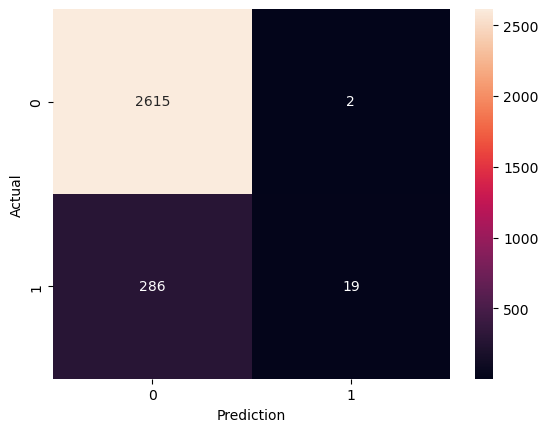

In [67]:
#Improving our Model by assigning Class Weight.


model = RandomForestClassifier(random_state=42, class_weight={0:1, 1:6})
model.fit(Xtrain,ytrain)
predictions = model.predict(Xtest)
report = classification_report(ytest,predictions,digits=5)
print(report)
matrix = confusion_matrix(ytest,predictions)
sns.heatmap(matrix, fmt='g',annot=True)
plt.xlabel('Prediction')
plt.ylabel('Actual')

Looking at the confusion matrix, and after adding a class weight to it, we could see a slight improvement in the model where the 

FALSE NEGATIVE is now 286 as against 288 when class weight was not added yet

TRUE POSITIVE is now 19 as against 17 when class weight was not added yet. We can still improve our model by doing a Class Imbalance to Over Sample our Minority class.

In [69]:
### Let's try to improve our Target features by performing over sampling using SMOTE


from imblearn.over_sampling import SMOTE

In [70]:
### Bringing back Features and Label as X and y

X = features.copy()
y = label.copy()

<Axes: xlabel='churn', ylabel='count'>

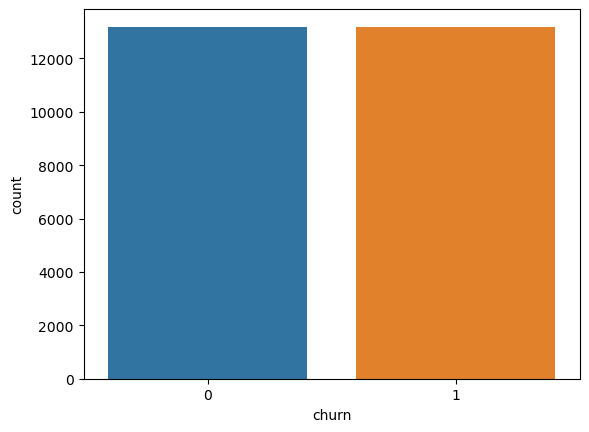

In [71]:
### Apply Smote to oversample the minority class.

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)

y_resampled.value_counts()

sns.countplot(x=y_resampled)

Looking at this, we can see that we now have a balanced class between both Label classes and we can now retrain our model for better performance.

              precision    recall  f1-score   support

           0    0.92921   0.97992   0.95389      2639
           1    0.97873   0.92527   0.95125      2636

    accuracy                        0.95261      5275
   macro avg    0.95397   0.95259   0.95257      5275
weighted avg    0.95396   0.95261   0.95257      5275



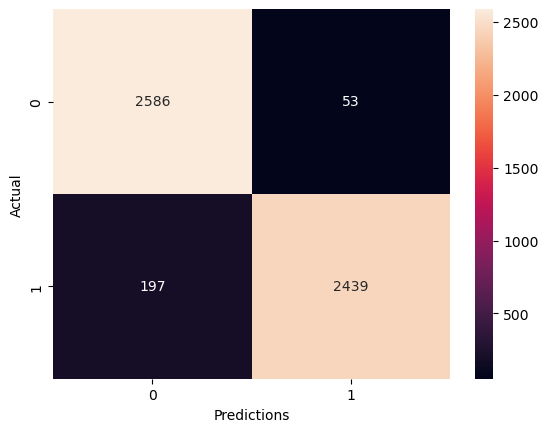

In [72]:
### Split the resampled model.

X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.20, random_state=42)

class_weights="balanced"   

model = RandomForestClassifier(random_state=42, class_weight=class_weights)
model.fit(X_train,y_train)
resampled_predictions = model.predict(X_test)
resampled_reports = classification_report(y_test,resampled_predictions,digits=5)
print(resampled_reports)
matrix = confusion_matrix(y_test,resampled_predictions)
sns.heatmap(matrix,annot=True, fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.show()


Explaiing the Confusion Matrix.

1.TRUE NEGATIVE(2586) - This means the model predicted 0 when the answer is 0(No Customer Churn) as well.

2.FALSE POSITIVE(53) - This means the model predicted 1 when the answer is 0(No Churn).

3.FALSE NEGATIVE(197) - This means the model falsely predicted no customer Churn, whereas the Actual outcome predicted (197) cases of Churn.

4.TRUE POSITIVE(2439) - This means the model predicted 1(CHURN) when the answer is 1 as well. This is a correct prediction from the Model.






--------------





Looking at our confusion Matrix and recall from both classes which are Class 0; 0.97992 and class 1; 0.92527. We finally have a good and convincing model that can be recommended to the stakeholders based on our good Recall on both Target classes. Our Accuracy stands at 0.95261 and also TN and TP are satisfactory. our FN is now 197 as compared to 286 when SMOTE has not been applied.

### Lets get our Feature Importances.

In [73]:
importances = model.feature_importances_
importances

array([0.02812073, 0.00792312, 0.02829002, 0.02192525, 0.00161258,
       0.0306429 , 0.01779356, 0.00771486, 0.00487165, 0.00746206,
       0.02155236, 0.03210691, 0.03161409, 0.00865655, 0.02340238,
       0.03957681, 0.01915393, 0.0089483 , 0.00646065, 0.01477475,
       0.00334533, 0.00320111, 0.02318788, 0.009652  , 0.00623463,
       0.01224942, 0.00557082, 0.004195  , 0.00744976, 0.00106358,
       0.00100842, 0.01417744, 0.00587266, 0.00319259, 0.01801207,
       0.00701511, 0.0180001 , 0.00897724, 0.01889087, 0.0137876 ,
       0.00389989, 0.01420458, 0.01747763, 0.00824973, 0.01688312,
       0.00523885, 0.00098705, 0.00517979, 0.04740383, 0.02977949,
       0.02135703, 0.02693166, 0.02095489, 0.02587396, 0.00750606,
       0.05113057, 0.01740546, 0.01187497, 0.03667315, 0.03262658,
       0.05067462])

In [74]:
feature_names = features.columns

In [116]:
feature_importances_df = pd.DataFrame({'features':feature_names, 'importance':importances})



### Sort the feature importance in Descending order.
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False).reset_index()
feature_importances_df

,index,features,importance
0,55,channel_foosdfpfkusacimwkcsosbicdxkicaua,0.051131
1,60,origin_up_lxidpiddsbxsbosboudacockeimpuepw,0.050675
2,48,tenure,0.047404
3,15,pow_max,0.039577
4,58,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,0.036673
...,...,...,...
56,33,var_6m_price_mid_peak,0.003193
57,4,forecast_discount_energy,0.001613
58,29,var_6m_price_peak_fix,0.001064
59,30,var_6m_price_mid_peak_fix,0.001008


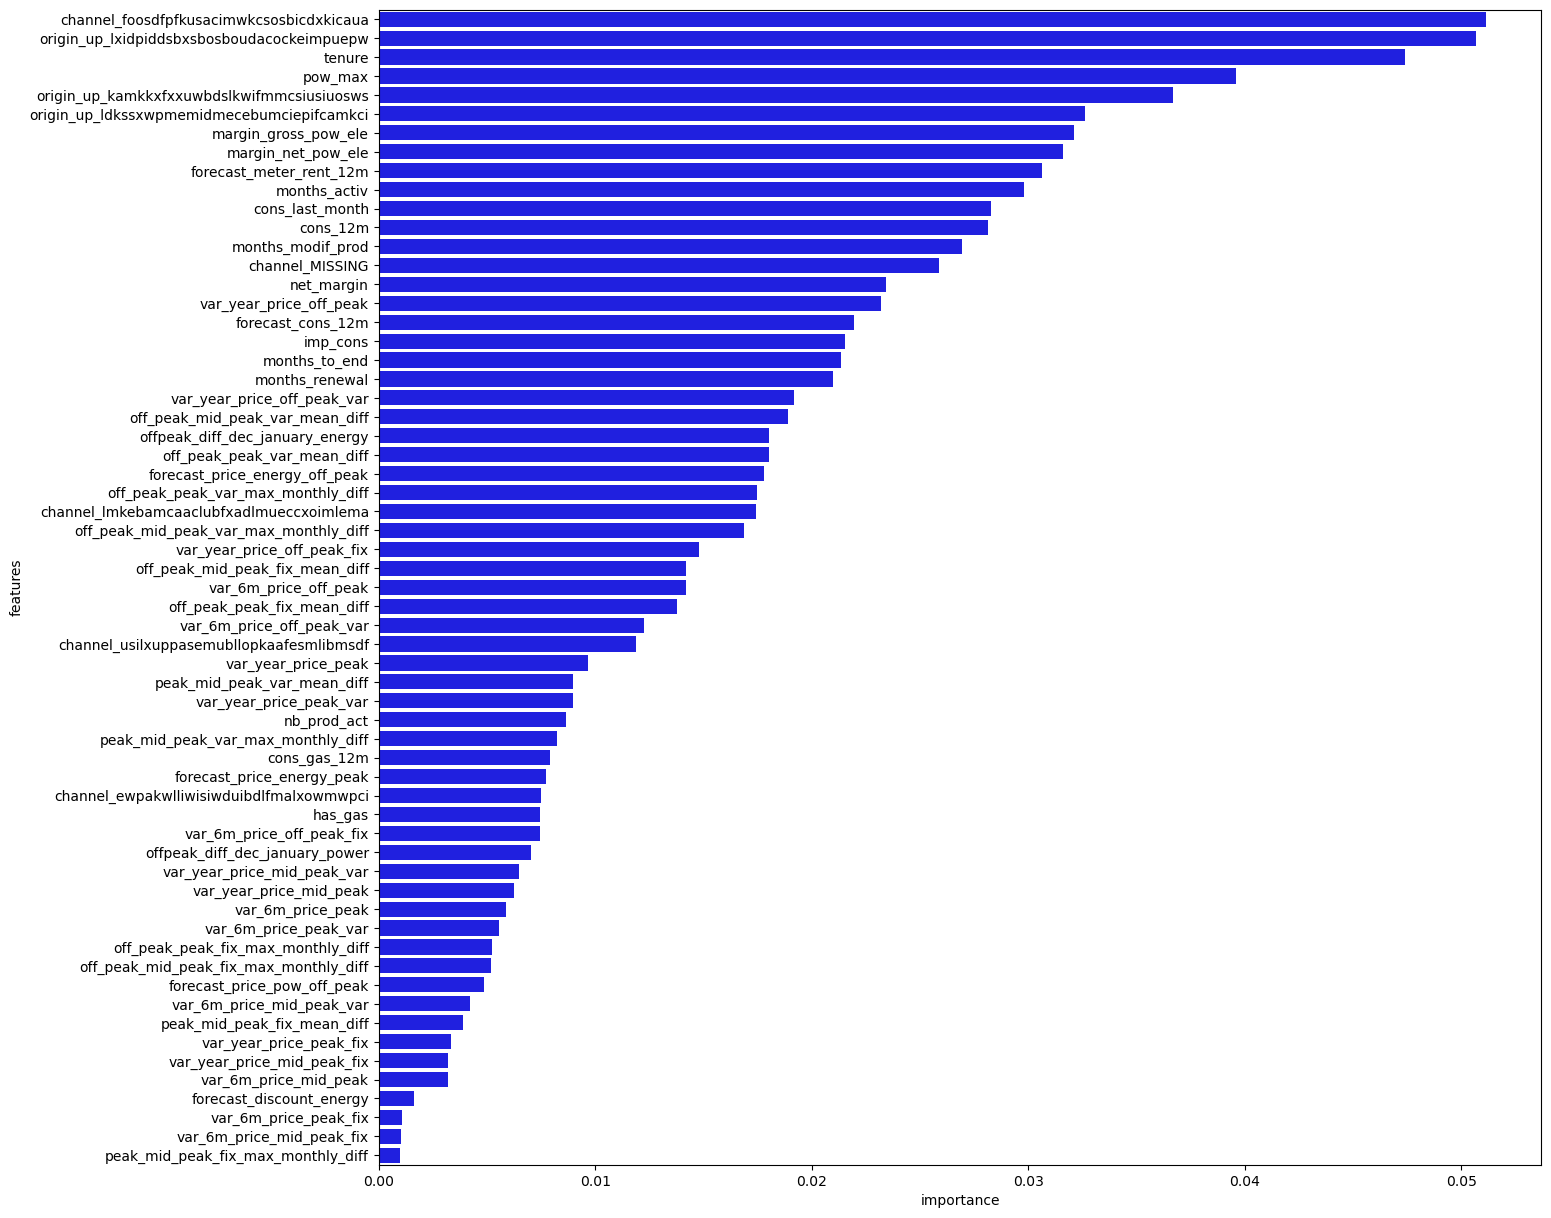

In [118]:
### We'll try to visualize to know the most important features.

plt.figure(figsize= (15,15))

axx=sns.barplot(y='features', x='importance',color='b', data=feature_importances_df)


plt.show()